In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
#chemin de données
data_path = '../docs/data-sell4all.xlsx'

*Partie I :*

In [19]:
#afichage de données
df = pd.read_excel(data_path)
df.head(5)

,Pays,Age,Genre,Dépenses des clients
0,France,32,Female,150.50
1,Germany,45,Male,200.75
2,Spain,28,Female,75.25
3,Italy,39,Male,180.00
4,UK,52,Female,250.30


In [20]:
#la fiche technique de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Pays                  65 non-null     object
 1    Age                  62 non-null     object
 2   Genre                 64 non-null     object
 3   Dépenses des clients  63 non-null     object
dtypes: object(4)
memory usage: 2.2+ KB


### Résumé technique de données

- Lignes : 65
- Colonnes : 4
- Toutes les colonnes sont actuellement de type object. Les colonnes **Âge** et **Dépenses des clients** devraient être converties en types numériques pour une analyse correcte.

- Valeurs Manquantes :

    - **Âge** : 3 valeurs manquantes
    - **Genre** : 1 valeur manquante
    - **Dépenses des clients** : 2 valeurs manquantes

In [21]:
#suppression des lignes incohérentes
df_clean = df.iloc[:55]

In [22]:
#statistiques sur la colonne Age
moy_age = df_clean[' Age '].mean()
median_age = df_clean[' Age '].median()

print("la moyenne d'age est :", moy_age )
print("la médian d'age est :", median_age)

la moyenne d'age est : 37.629629629629626
la médian d'age est : 36.5


In [ ]:
df_clean['Dépenses des clients'] = df_clean['Dépenses des clients'].astype(float)

In [24]:
#statistiques sur la colonne de dépenses des clients
moy_depenses = df_clean['Dépenses des clients'].mean()
median_depenses = df_clean['Dépenses des clients'].median()

print("la moyenne de dépenses des clients est :", moy_depenses )
print("la médian de dépenses des clients est :", median_depenses)

la moyenne de dépenses des clients est : 157.02407407407406
la médian de dépenses des clients est : 162.875


*Partie II :*

In [25]:
depenses_par_pays = df_clean.groupby('Pays')['Dépenses des clients'].sum()

In [26]:
depenses_par_pays.head(5)

Pays
Australia     210.50
Brazil        195.25
Canada          0.00
France       1543.00
Germany      1608.75
Name: Dépenses des clients, dtype: float64

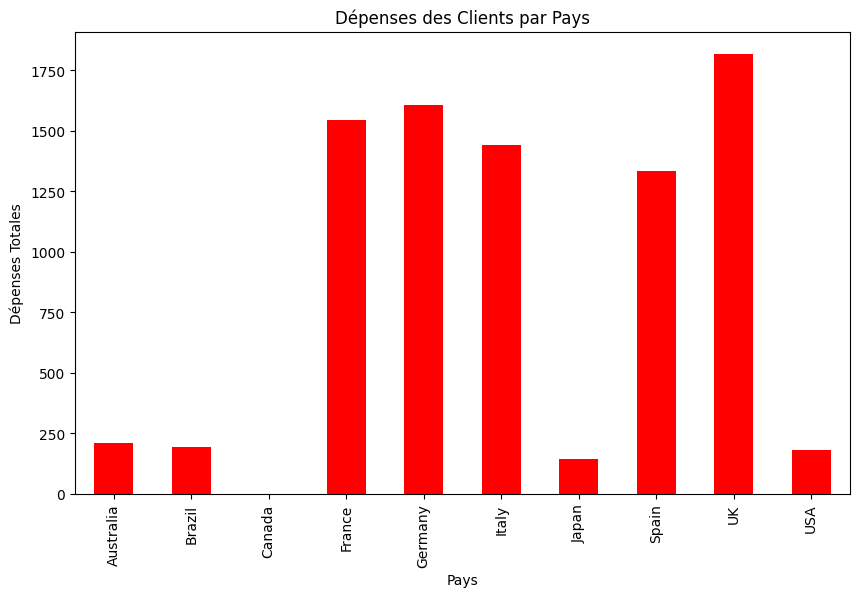

In [27]:
plt.figure(figsize=(10, 6))
depenses_par_pays.plot(kind='bar', color='red')

plt.title('Dépenses des Clients par Pays')
plt.xlabel('Pays')
plt.ylabel('Dépenses Totales')

plt.show()

In [28]:
#suppression les lignes d’utilisateurs ayant dépensé moins de 10€ sur le site
df_filter = df_clean[df_clean['Dépenses des clients'] >= 10]
df_filter.head(5)

,Pays,Age,Genre,Dépenses des clients
0,France,32,Female,150.50
1,Germany,45,Male,200.75
2,Spain,28,Female,75.25
3,Italy,39,Male,180.00
4,UK,52,Female,250.30


In [29]:
#supression des doublons 
df_unique = df_filter.drop_duplicates()

In [30]:
#sauvgarde les données dans un fichier CSV
df_unique.to_csv('../docs/data-sell4all-clean.csv', index=False)